In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!ls '/content/drive/My Drive/Tertiary Courses/Colab/DeepLearningTensorflow/mnist_records'

mnist_test.tfrecords  mnist_train.tfrecords


In [0]:
data_path = '/content/drive/My Drive/Tertiary Courses/Colab/DeepLearningTensorflow/mnist_records'
train_path = data_path + '/mnist_train.tfrecords'
test_path = data_path + '/mnist_test.tfrecords'

In [0]:
# Step 1: Create a TFRecordDataset and iterator
dset = tf.data.TFRecordDataset(test_path)
iter = dset.make_one_shot_iterator()

In [0]:
# Step 2: Parse the first example
sess = tf.Session()
record = sess.run(iter.get_next())

In [0]:
# Step 3: Parse the first example
def parse_record(record):
    # Create a dictionary that describes the examples
    feature_dict = {'image_raw': tf.FixedLenFeature([], tf.string),
                    'label': tf.FixedLenFeature([], tf.int64)}
    
    parsed_record = tf.parse_single_example(record, feature_dict)
    
    image = tf.decode_raw(parsed_record['image_raw'], tf.int64)
    label = tf.cast(parsed_record['label'], tf.int32)

    return image, label
    

In [0]:
pixel_matrix, label = sess.run(parse_record(record))

In [37]:
# pixel_matrix.min()

0

In [0]:
# Step 4: Convert the data in the first image to a 28-by-28 array
pixel_matrix = pixel_matrix.reshape((28, 28))

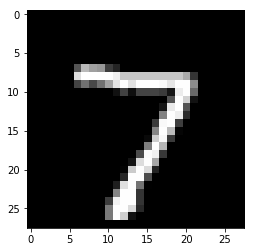

In [36]:
# Step 5: Display the image
plt.imshow(pixel_matrix, cmap='gray')
plt.show()